In [53]:
#Importing the Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
import sklearn.metrics as metcis
import warnings
warnings.filterwarnings("ignore")

In [199]:
#Importing Datasets
df=pd.read_excel("CompData-1.xlsx")

In [200]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,...,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02,0
1,21214,Tata Tele. Mah.,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03,1
2,14852,ABG Shipyard,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04,0
3,2439,GTL,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03,0
4,23505,Bharati Defence,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,...,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02,0


In [201]:
#Fixing messy column names (containing spaces) for ease of use
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [202]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,...,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02,0
1,21214,Tata Tele. Mah.,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03,1
2,14852,ABG Shipyard,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04,0
3,2439,GTL,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03,0
4,23505,Bharati Defence,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,...,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02,0


In [207]:
#Removing First character
columnNameList=[]
def rename_cols():
    i=0
    for x in df:
        columnNme=df.columns[i]
        i=i+1
        if(x[0]=='_'):
            columnNme=columnNme[1:]
        columnNameList.append(columnNme)

In [208]:
rename_cols()

In [209]:
df.columns=columnNameList

In [210]:
df.head()

,Co_Code,Co_Name,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,...,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability,Default
0,16974,Hind.Cables,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,...,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02,0
1,21214,Tata Tele. Mah.,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03,1
2,14852,ABG Shipyard,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04,0
3,2439,GTL,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03,0
4,23505,Bharati Defence,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,...,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02,0


In [211]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   Realized_Sales_Gros

In [213]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,2058.00,17572.11,21892.89,4.00,3674.00,6240.00,24280.75,72493.00
Operating_Expense_Rate,2058.00,2052388835.76,3252623690.29,0.00,0.00,0.00,4110000000.00,9980000000.00
Research_and_development_expense_rate,2058.00,1208634256.56,2144568158.08,0.00,0.00,0.00,1550000000.00,9980000000.00
Cash_flow_rate,2058.00,0.47,0.02,0.00,0.46,0.46,0.47,1.00
Interest_bearing_debt_interest_rate,2058.00,11130223.52,90425949.04,0.00,0.00,0.00,0.00,990000000.00
Tax_rate_A,2058.00,0.11,0.15,0.00,0.00,0.04,0.22,1.00
Cash_Flow_Per_Share,1891.00,0.32,0.02,0.17,0.31,0.32,0.33,0.46
Per_Share_Net_profit_before_tax_Yuan_,2058.00,0.18,0.03,0.00,0.17,0.18,0.19,0.79
Realized_Sales_Gross_Profit_Growth_Rate,2058.00,0.02,0.02,0.00,0.02,0.02,0.02,1.00
Operating_Profit_Growth_Rate,2058.00,0.85,0.00,0.74,0.85,0.85,0.85,1.00


In [65]:
pd.options.display.float_format = '{:.2f}'.format   

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,2058.00,17572.11,21892.89,4.00,3674.00,6240.00,24280.75,72493.00
Operating_Expense_Rate,2058.00,2052388835.76,3252623690.29,0.00,0.00,0.00,4110000000.00,9980000000.00
Research_and_development_expense_rate,2058.00,1208634256.56,2144568158.08,0.00,0.00,0.00,1550000000.00,9980000000.00
Cash_flow_rate,2058.00,0.47,0.02,0.00,0.46,0.46,0.47,1.00
Interest_bearing_debt_interest_rate,2058.00,11130223.52,90425949.04,0.00,0.00,0.00,0.00,990000000.00
Tax_rate_A,2058.00,0.11,0.15,0.00,0.00,0.04,0.22,1.00
Cash_Flow_Per_Share,1891.00,0.32,0.02,0.17,0.31,0.32,0.33,0.46
Per_Share_Net_profit_before_tax_Yuan_,2058.00,0.18,0.03,0.00,0.17,0.18,0.19,0.79
Realized_Sales_Gross_Profit_Growth_Rate,2058.00,0.02,0.02,0.00,0.02,0.02,0.02,1.00
Operating_Profit_Growth_Rate,2058.00,0.85,0.00,0.74,0.85,0.85,0.85,1.00


Lets check for missing values in the dataset

In [214]:
df.isnull().sum()

Co_Code                                               0
Co_Name                                               0
Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 167
Per_Share_Net_profit_before_tax_Yuan_                 0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                     

In [67]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Co_Code,Co_Name,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,...,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability,Default


In [68]:
df["Default"].value_counts()

Default
0    1838
1     220
Name: count, dtype: int64

In [69]:
df["Default"].value_counts(normalize=True)

Default
0   0.89
1   0.11
Name: proportion, dtype: float64

In [215]:
df.drop(['Co_Name', 'Co_Code'],inplace=True,axis=1)

In [32]:
df.size

115248

Treating Missing Values

In [71]:
#Columns with missing values
print(np.where(df.isnull().sum()>0))

(array([ 5, 17, 29, 47], dtype=int64),)


In [72]:
cols_missing=df.isnull().sum()[df.isnull().sum()>0].index
cols_missing

Index(['Cash_Flow_Per_Share', 'Total_debt_to_Total_net_worth',
       'Cash_to_Total_Assets', 'Current_Liability_to_Current_Assets'],
      dtype='object')

In [75]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer= imputer.fit(df[cols_missing].iloc[:,:])

df[cols_missing]=imputer.transform(df[cols_missing])

In [76]:
df.isnull().sum().sum()

0

In [216]:
df_X = df.drop(['Default'], axis = 1)
df_Y = df['Default']

Outlier Treatment

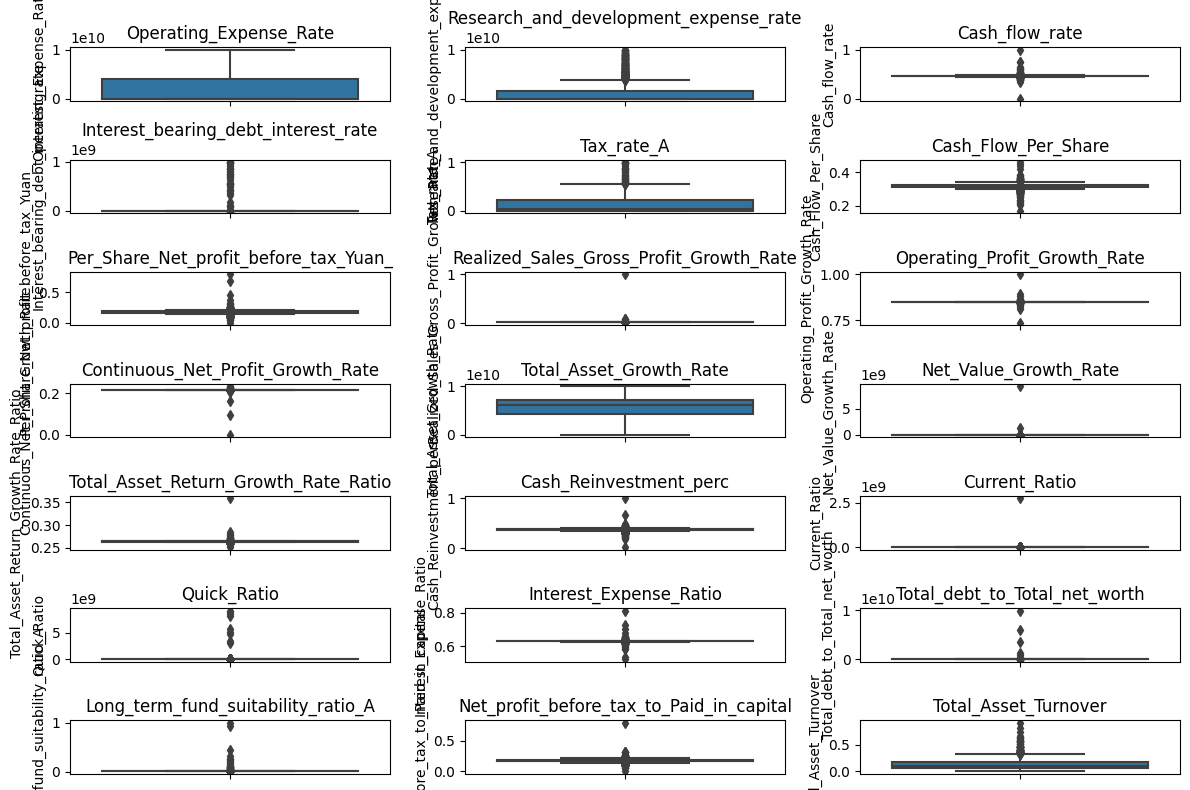

In [232]:
plt.figure(figsize=(12,8))
feature_list=df_X.columns
for i in range(21):
    plt.subplot(7,3,i+1)
    sns.boxplot(y=df_X[feature_list[i]], data=df_X)
    plt.title(format(feature_list[i]))
    plt.tight_layout()

['Operating_Expense_Rate', 'Research_and_development_expense_rate', 'Cash_flow_rate', 'Interest_bearing_debt_interest_rate', 'Tax_rate_A', 'Cash_Flow_Per_Share', 'Per_Share_Net_profit_before_tax_Yuan_', 'Realized_Sales_Gross_Profit_Growth_Rate', 'Operating_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate', 'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate', 'Total_Asset_Return_Growth_Rate_Ratio', 'Cash_Reinvestment_perc', 'Current_Ratio', 'Quick_Ratio', 'Interest_Expense_Ratio', 'Total_debt_to_Total_net_worth', 'Long_term_fund_suitability_ratio_A', 'Net_profit_before_tax_to_Paid_in_capital', 'Total_Asset_Turnover', 'Accounts_Receivable_Turnover', 'Average_Collection_Days', 'Inventory_Turnover_Rate_times', 'Fixed_Assets_Turnover_Frequency', 'Net_Worth_Turnover_Rate_times', 'Operating_profit_per_person', 'Allocation_rate_per_person', 'Quick_Assets_to_Total_Assets', 'Cash_to_Total_Assets', 'Quick_Assets_to_Current_Liability', 'Cash_to_Current_Liability', 'Operating_Funds_to_Liabili

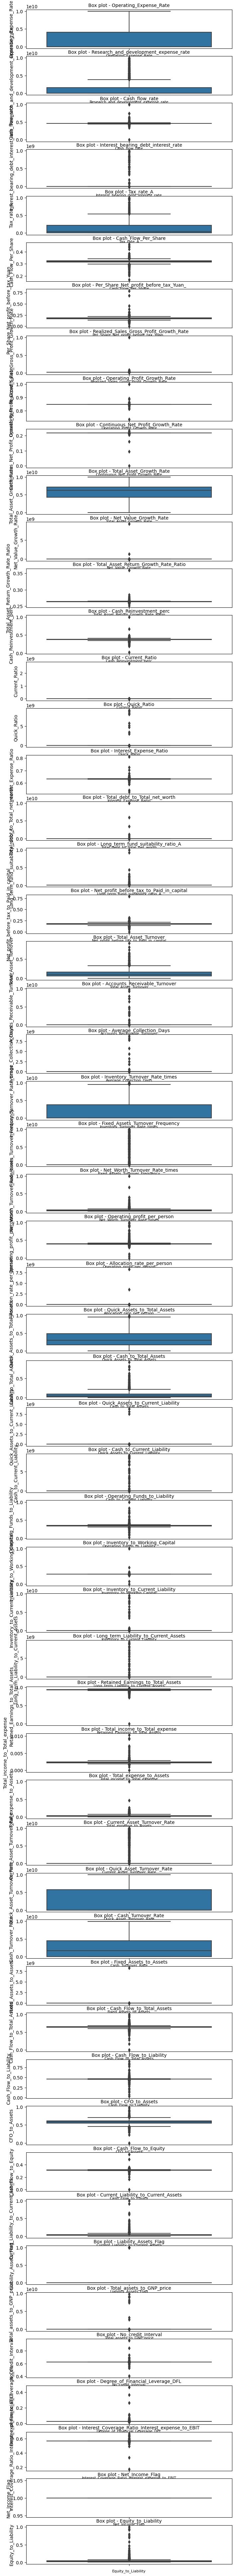

In [344]:
# plt.figure(figsize=(12,8))
# feature_list=df_X.columns
# for i in range(20, 39):
#     plt.subplot(5,4,i)
#     sns.boxplot(y=df_X[feature_list[i]], data=df_X)
#     plt.title(format(feature_list[i]))
#     plt.tight_layout()
feature_list=list(df_X.columns)
print(feature_list)
fig,ax=plt.subplots(len(feature_list), figsize=(8,100))
for i, col_val in enumerate(feature_list):
    print(col_val)
    sns.boxplot(y=df_X[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [425]:
df['Cash_Turnover_Rate'].max()

9990000000.0

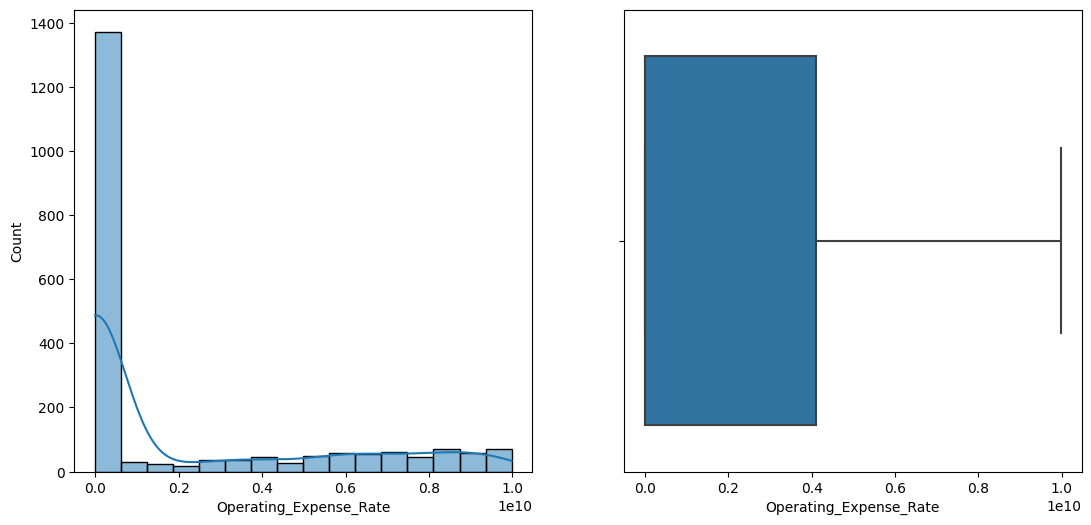

In [401]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Operating_Expense_Rate'], kde=True, ax=axes[0])
sns.boxplot(x='Operating_Expense_Rate', data=df, ax=axes[1])
plt.show()

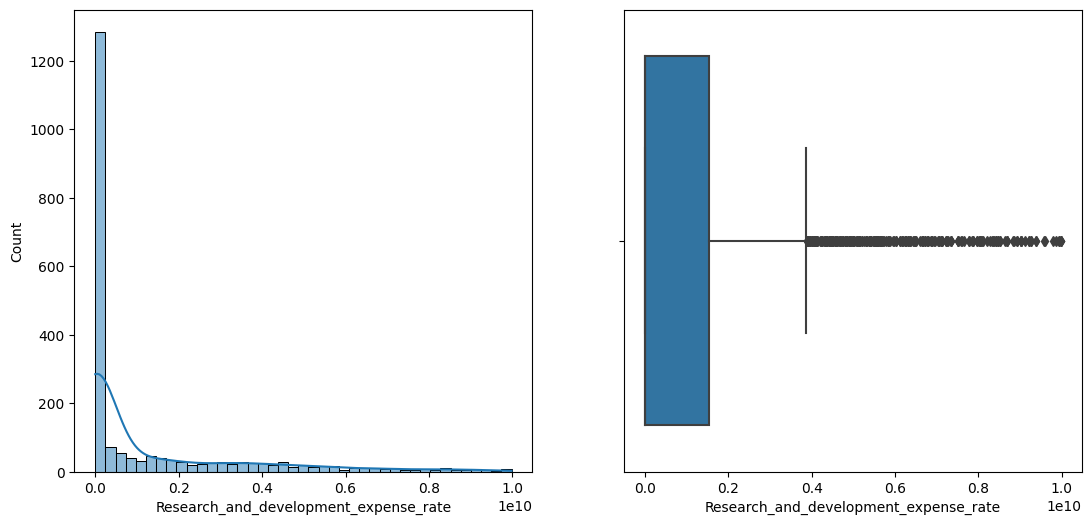

In [402]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Research_and_development_expense_rate'], kde=True, ax=axes[0])
sns.boxplot(x='Research_and_development_expense_rate', data=df, ax=axes[1])
plt.show()

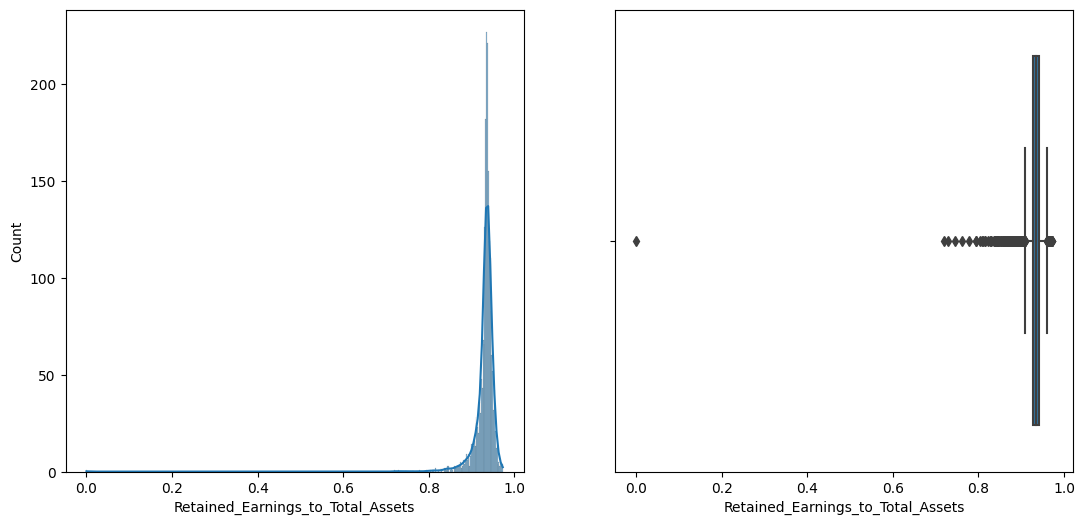

In [403]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Retained_Earnings_to_Total_Assets'], kde=True, ax=axes[0])
sns.boxplot(x='Retained_Earnings_to_Total_Assets', data=df, ax=axes[1])
plt.show()

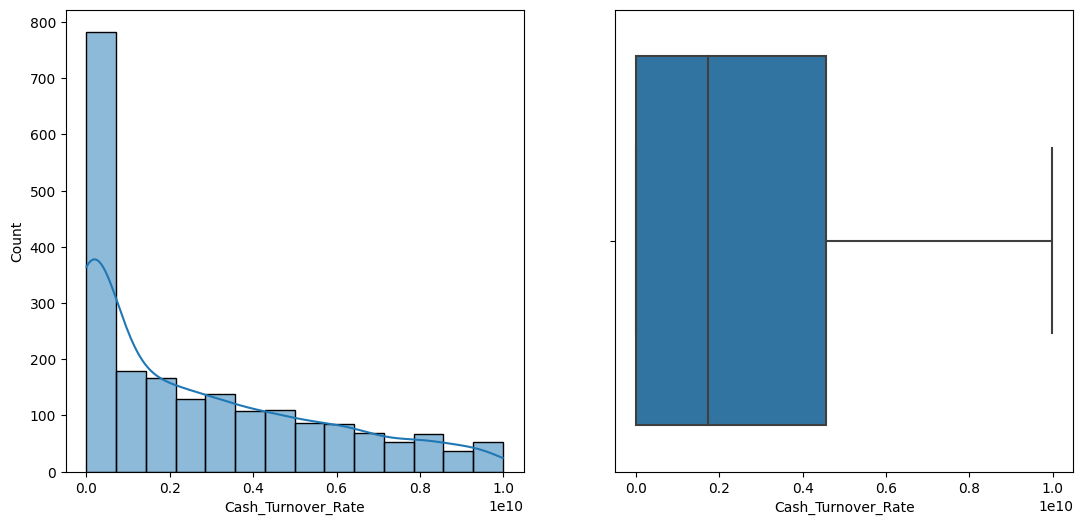

In [404]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Cash_Turnover_Rate'], kde=True, ax=axes[0])
sns.boxplot(x='Cash_Turnover_Rate', data=df, ax=axes[1])
plt.show()

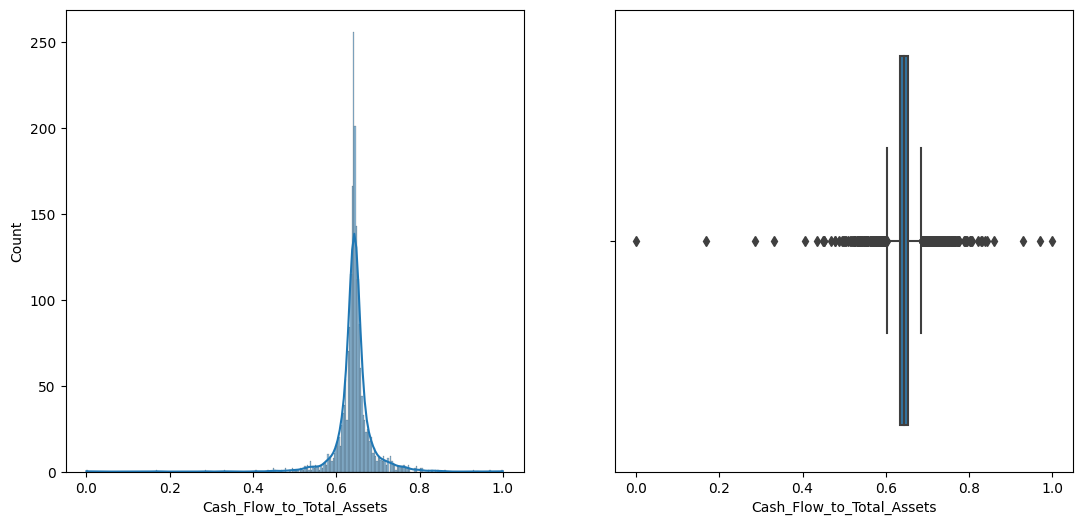

In [405]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Cash_Flow_to_Total_Assets'], kde=True, ax=axes[0])
sns.boxplot(x='Cash_Flow_to_Total_Assets', data=df, ax=axes[1])
plt.show()

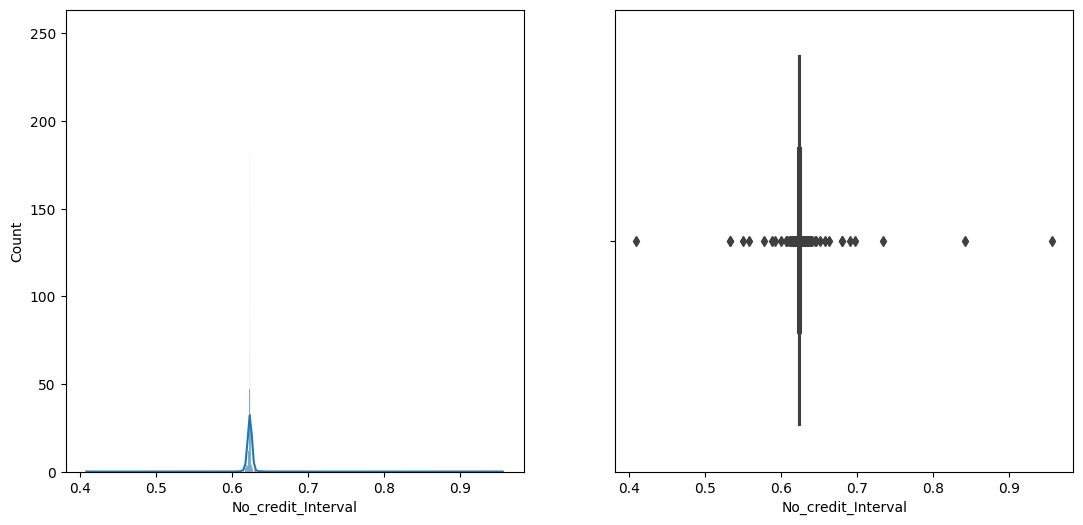

In [406]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['No_credit_Interval'], kde=True, ax=axes[0])
sns.boxplot(x='No_credit_Interval', data=df, ax=axes[1])
plt.show()

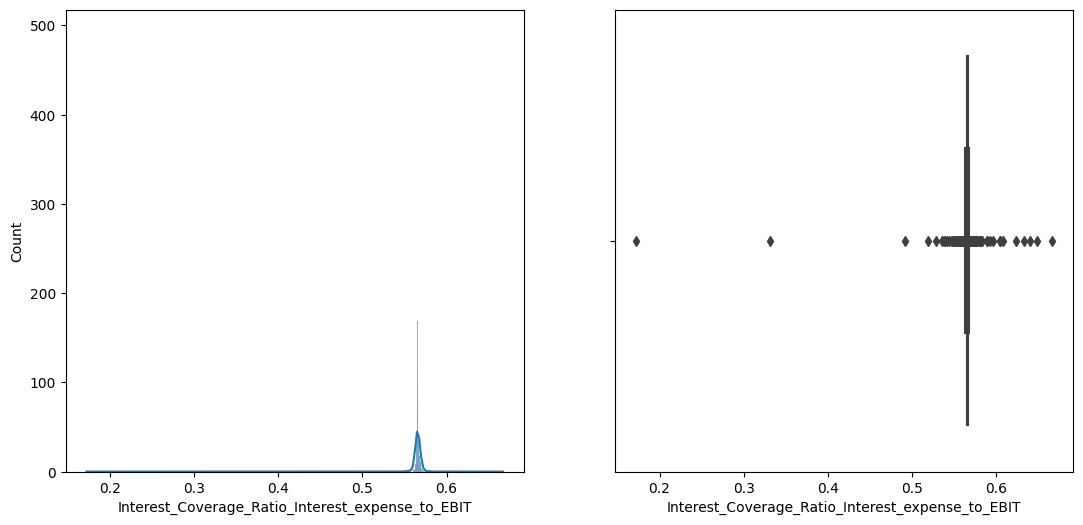

In [407]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(13,6))
sns.histplot(df['Interest_Coverage_Ratio_Interest_expense_to_EBIT'], kde=True, ax=axes[0])
sns.boxplot(x='Interest_Coverage_Ratio_Interest_expense_to_EBIT', data=df, ax=axes[1])
plt.show()

In [82]:
Q1 = df_X.quantile(0.25)
Q3 = df_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [83]:
((((df_X > UL) | (df_X < LL)).sum()/df_X.index.size).sort_values(ascending=False))

Fixed_Assets_Turnover_Frequency                    0.24
Current_Asset_Turnover_Rate                        0.23
Degree_of_Financial_Leverage_DFL                   0.21
Cash_Flow_to_Liability                             0.20
No_credit_Interval                                 0.19
Interest_Coverage_Ratio_Interest_expense_to_EBIT   0.18
Operating_profit_per_person                        0.17
Continuous_Net_Profit_Growth_Rate                  0.17
Interest_Expense_Ratio                             0.16
Cash_Flow_to_Total_Assets                          0.15
Operating_Profit_Growth_Rate                       0.15
Cash_Flow_to_Equity                                0.15
Net_Value_Growth_Rate                              0.15
Realized_Sales_Gross_Profit_Growth_Rate            0.14
Accounts_Receivable_Turnover                       0.14
Research_and_development_expense_rate              0.13
Cash_to_Current_Liability                          0.12
Inventory_to_Working_Capital                    

In [84]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [85]:
for i in df_X:
    df_X[i]=treat_outlier(df_X[i])

0.000111127 0.00015787275 4110000000.0 8971499999.999998 <built-in function min> <built-in function max>
0.0 0.0 1550000000.0 6235999999.999994 <built-in function min> <built-in function max>
0.45200791775 0.460099142 0.46806908049999996 0.48237647095 <built-in function min> <built-in function max>
0.0 0.000276028 0.000663066 0.0010774079999999998 <built-in function min> <built-in function max>
0.0 0.0 0.21619090975 0.3416236463499999 <built-in function min> <built-in function max>
0.2999522528 0.315705242 0.325387282 0.33788816574999997 <built-in function min> <built-in function max>
0.14042328805 0.166603901 0.185885366 0.21451758669999998 <built-in function min> <built-in function max>
0.0219479388 0.022058314000000002 0.022151999 0.022579723299999997 <built-in function min> <built-in function max>
0.84770057975 0.84797396475 0.848114747 0.8485231827 <built-in function min> <built-in function max>
0.21737961015 0.217574132 0.21761982075 0.21774071545 <built-in function min> <built-i

<Axes: >

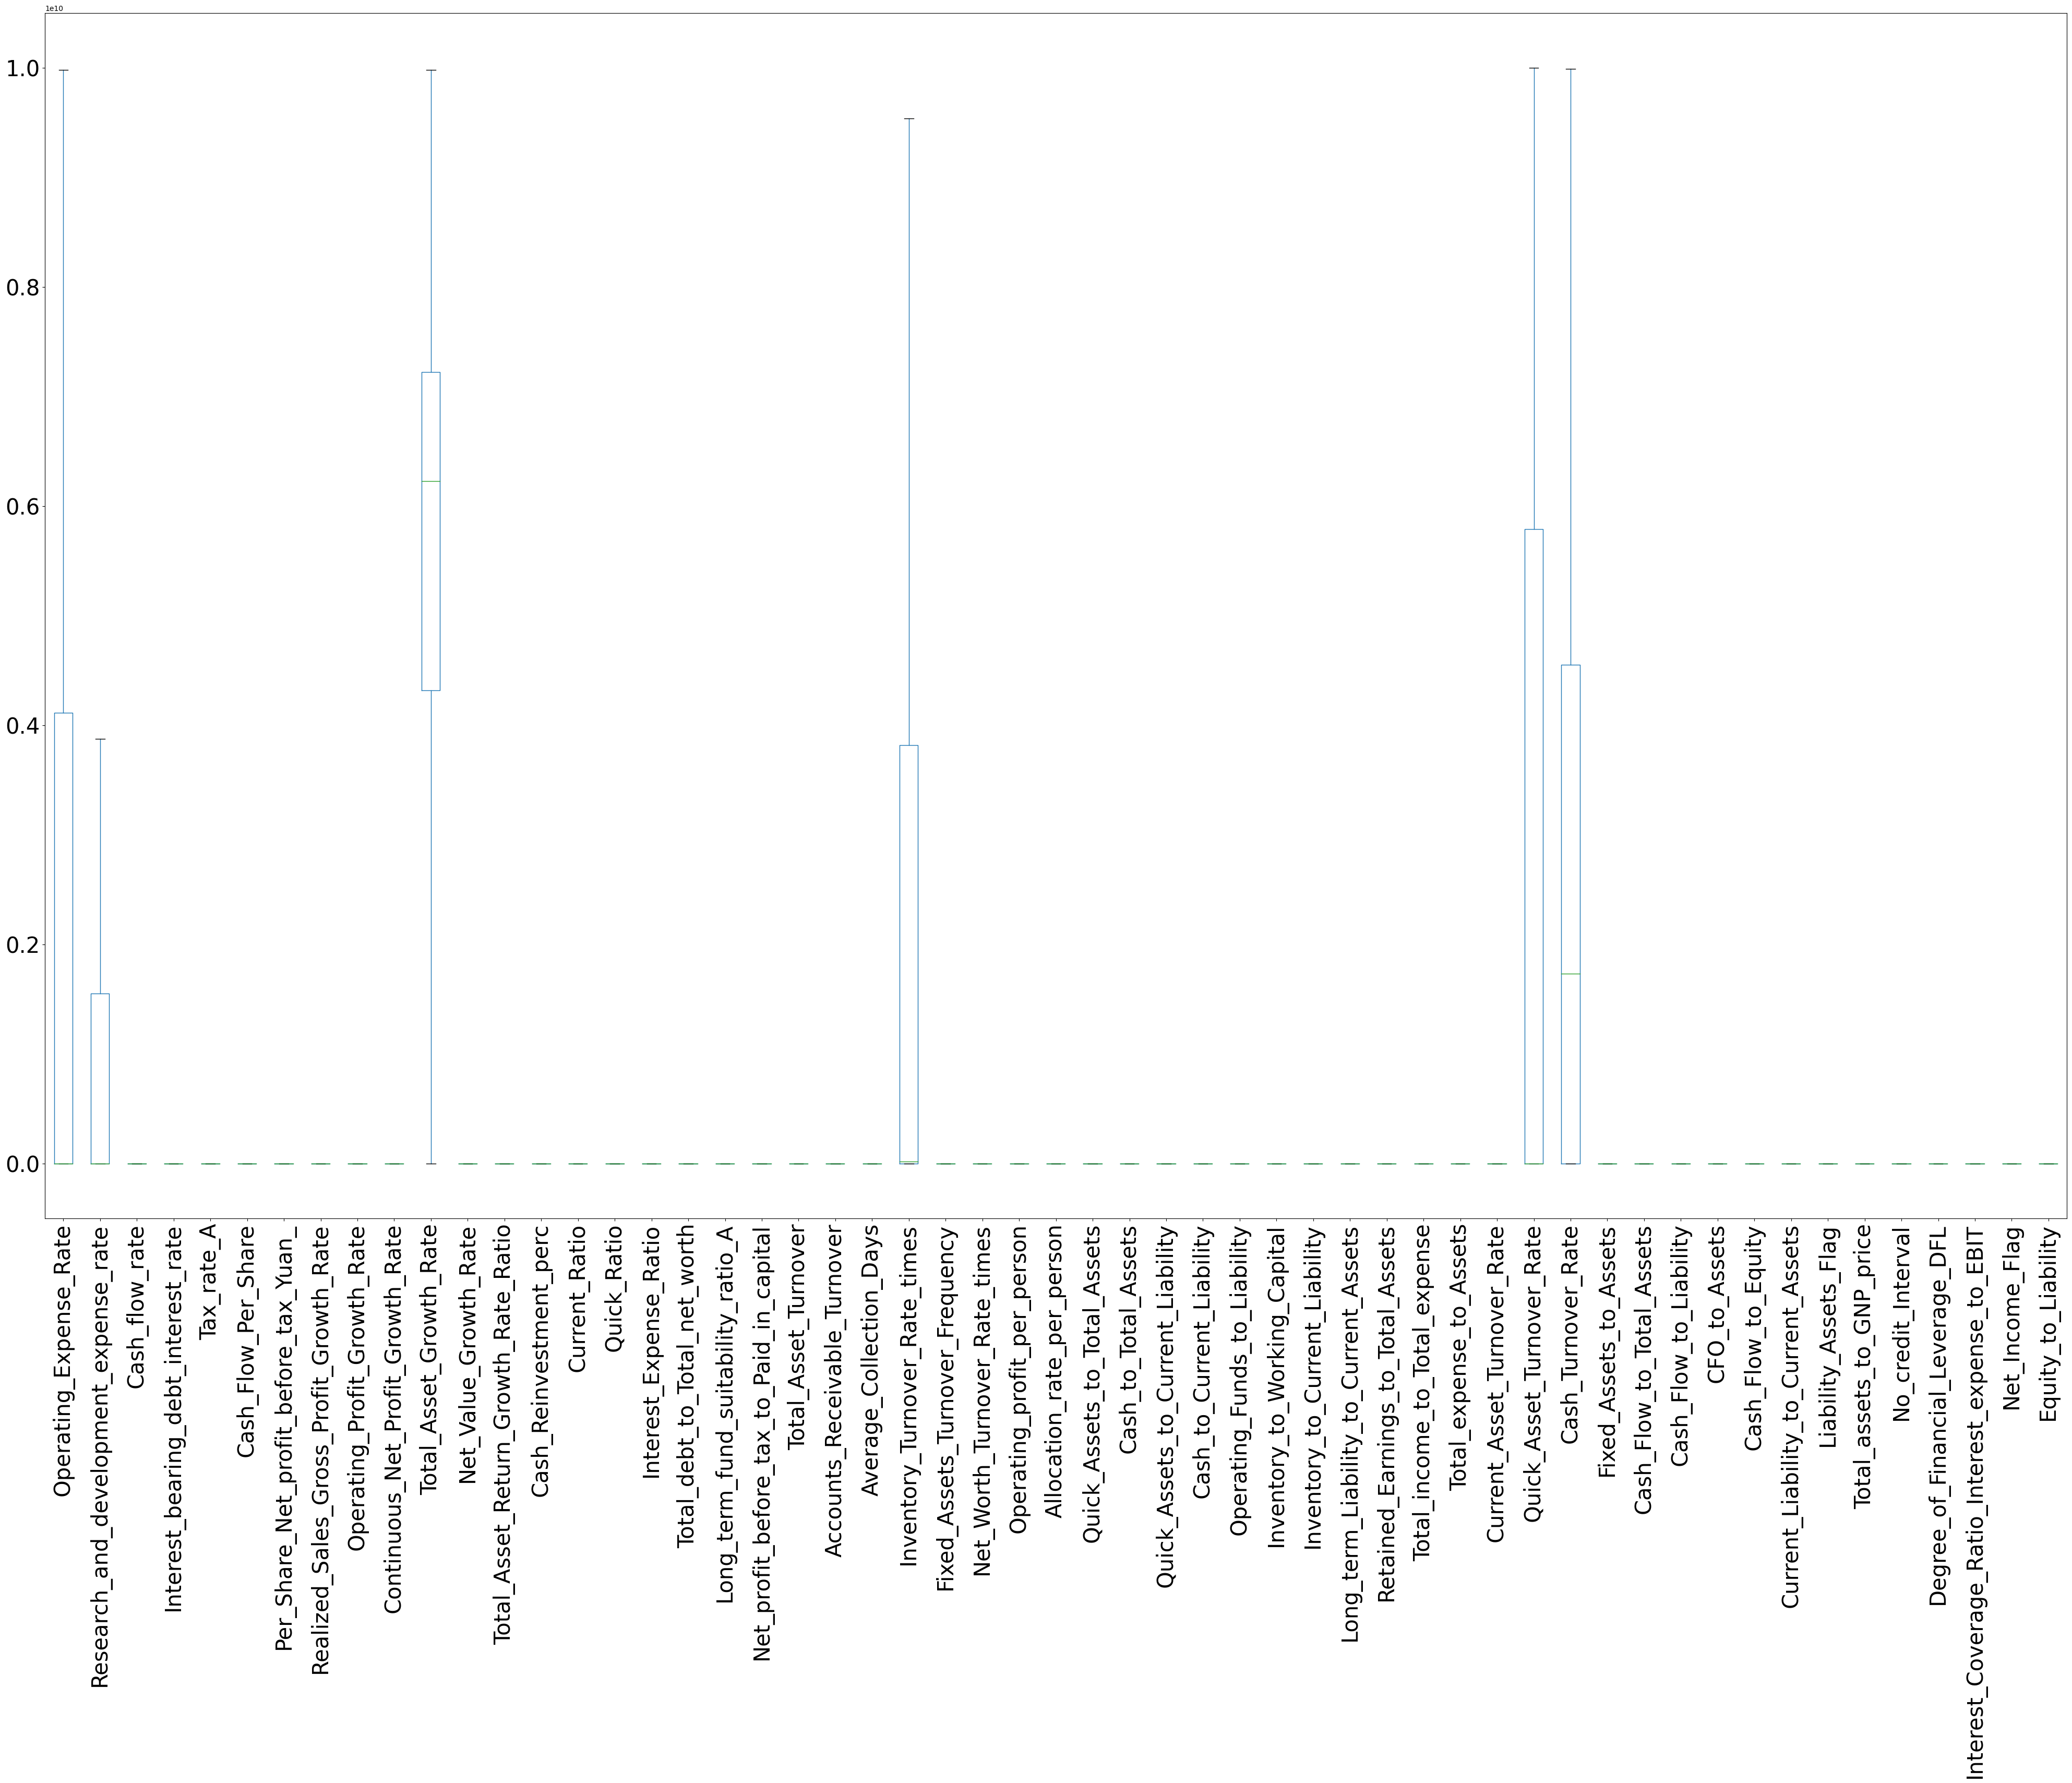

In [86]:
plt.figure(figsize=(50,30))
df_X.boxplot(grid=False, rot=90, fontsize=30)

Univariate And Bivariate Analysis

In [345]:

df_temp_2=df_X[['Operating_Expense_Rate', 
'Research_and_development_expense_rate',
'Retained_Earnings_to_Total_Assets',
'Cash_Turnover_Rate',
'Cash_Flow_to_Total_Assets',
'No_credit_Interval' ,
'Interest_Coverage_Ratio_Interest_expense_to_EBIT']]

<Axes: >

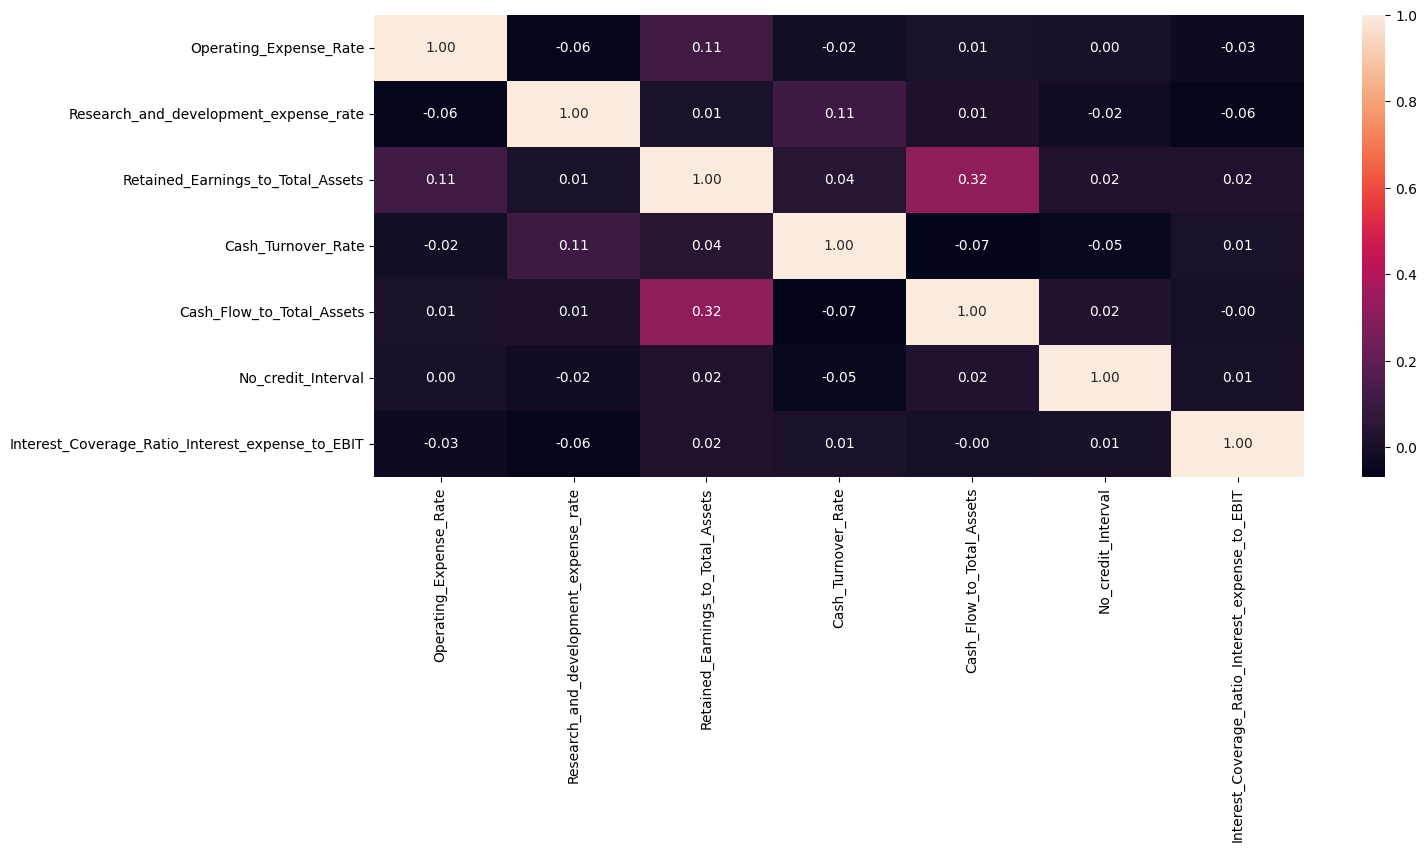

In [347]:
plt.figure(figsize=(15,6))
sns.heatmap(df_temp_2.corr(), annot=True, fmt=".2f")

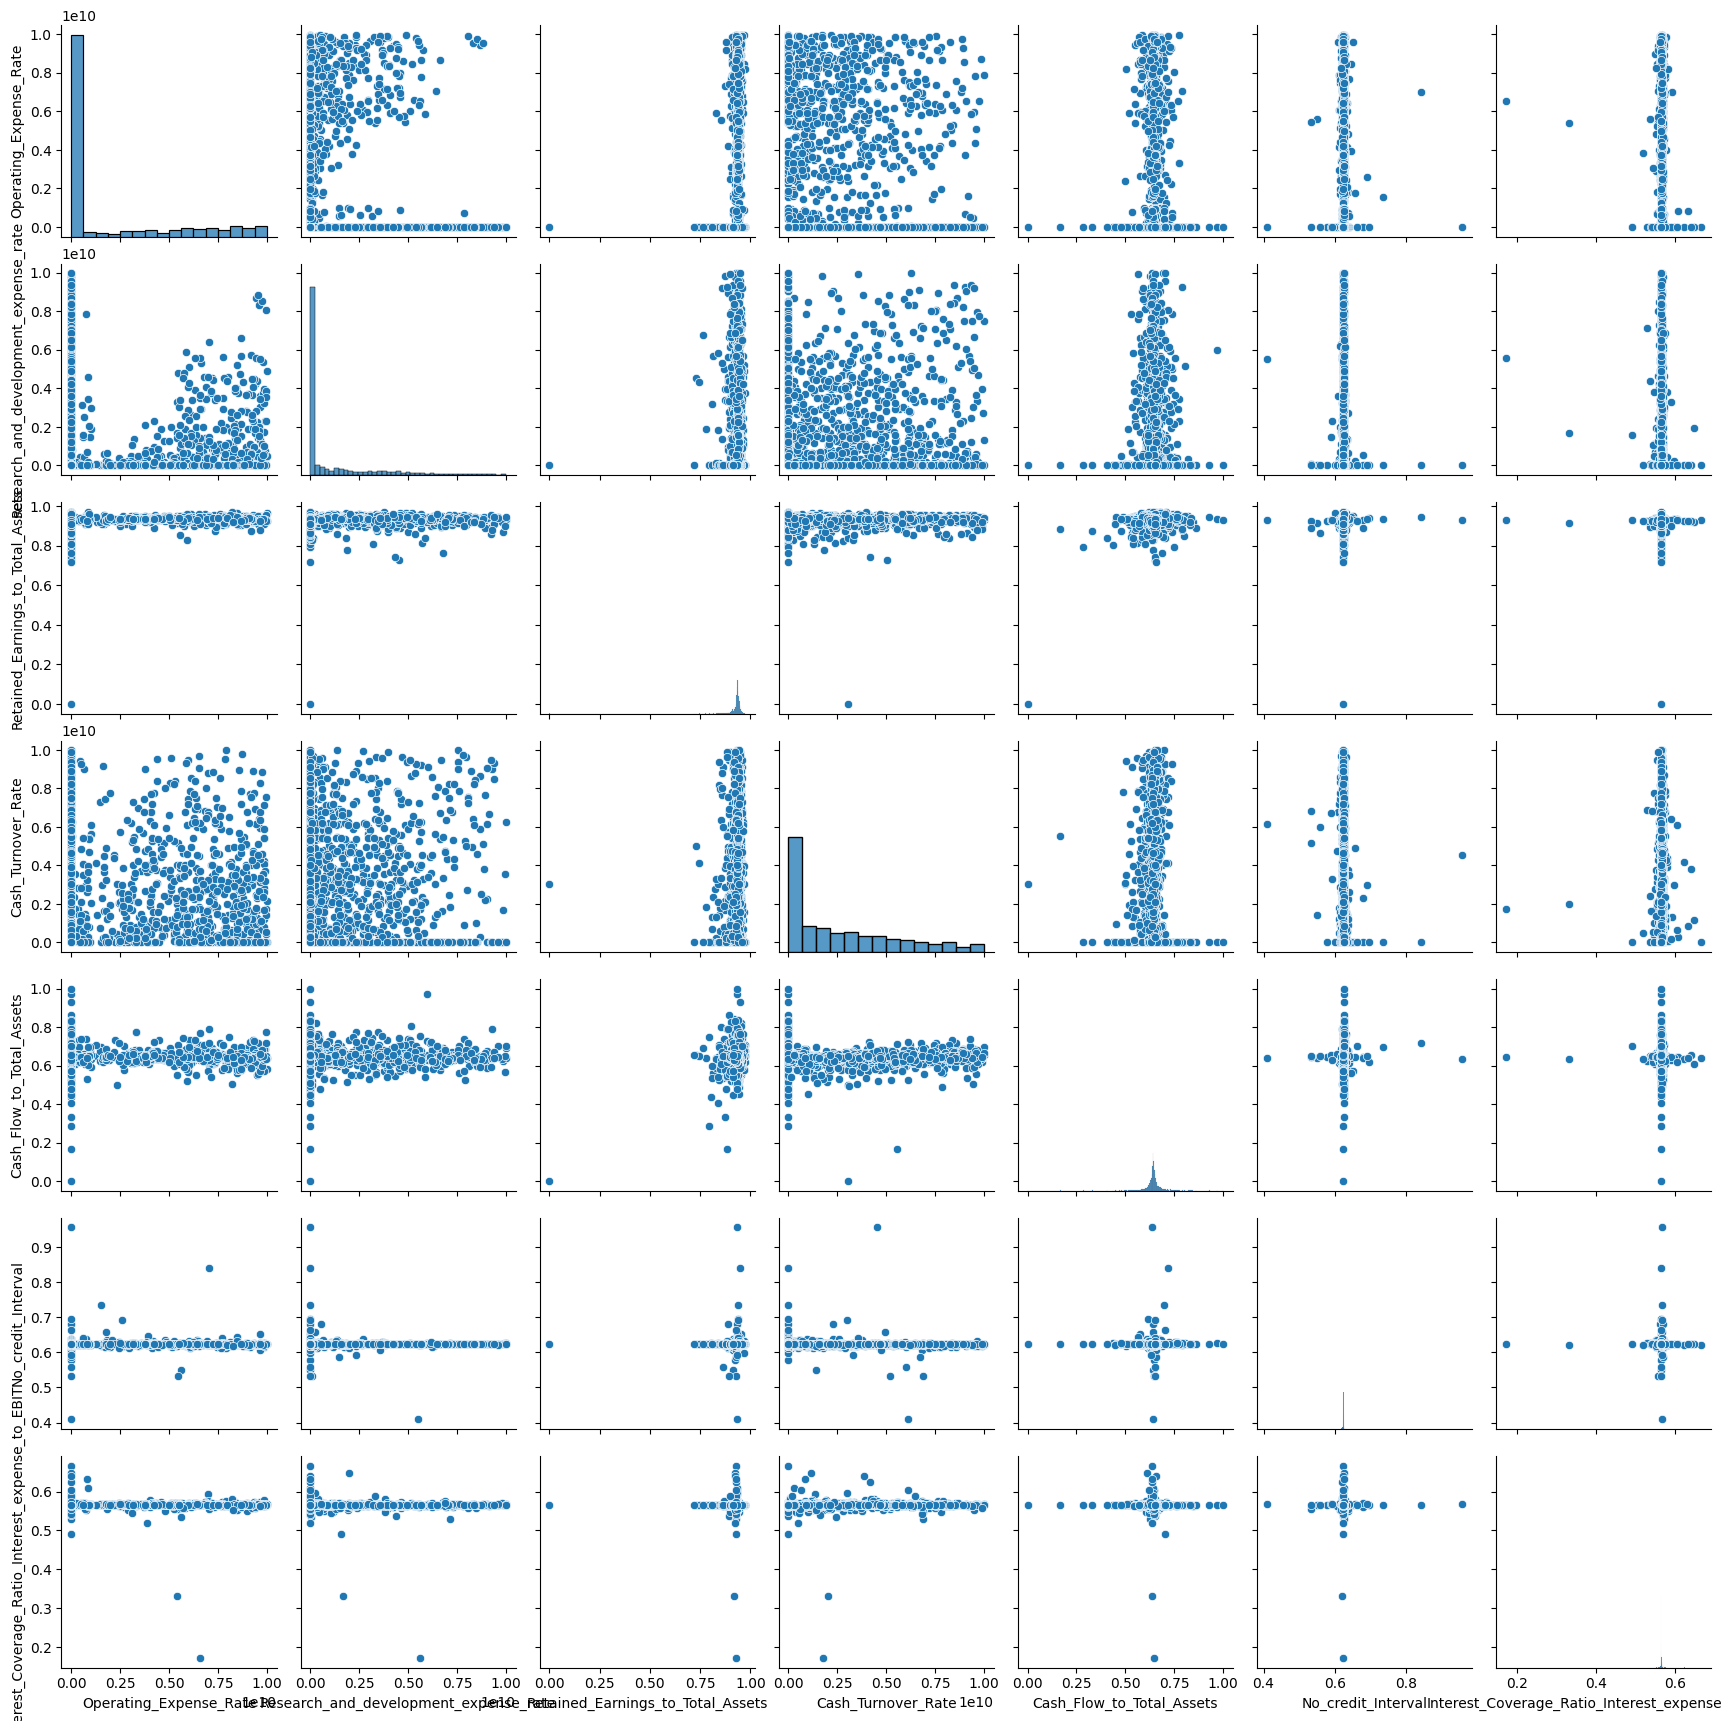

In [348]:
sns_plot = sns.pairplot(df_temp_2)

In [ ]:
sns.boxplot(x=df['Default'],y=y_predict_train)
plt.xlabel('Default');

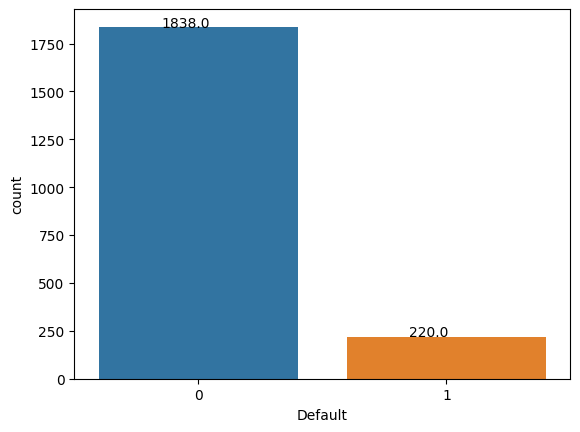

In [409]:
ax = sns.countplot(x='Default', data=df)
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01))

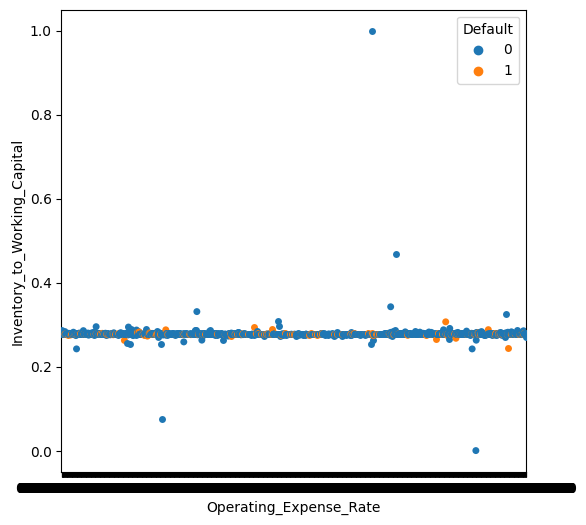

In [414]:
plt.figure(figsize=(6,6))
sns.stripplot(x="Operating_Expense_Rate", y="Inventory_to_Working_Capital", data=df, hue="Default", jitter=True) 
plt.show()

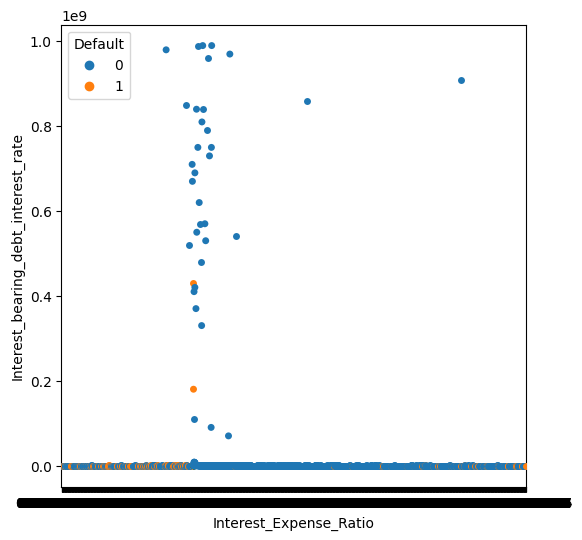

In [416]:
plt.figure(figsize=(6,6))
sns.stripplot(x="Interest_Expense_Ratio", y="Interest_bearing_debt_interest_rate", data=df, hue="Default", jitter=True) 
plt.show()

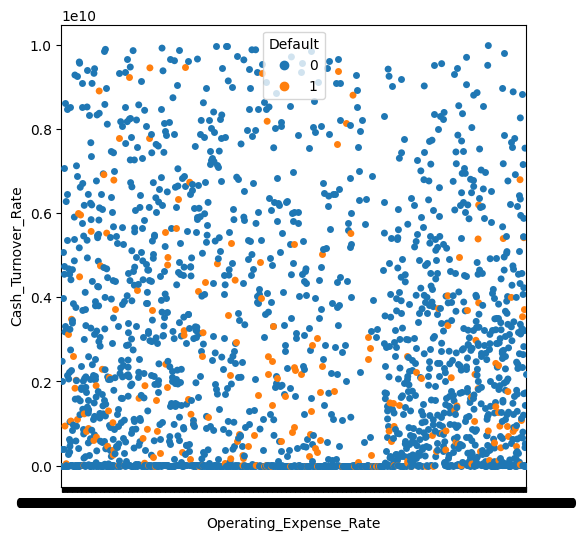

In [418]:
plt.figure(figsize=(6,6))
sns.stripplot(x="Operating_Expense_Rate", y="Cash_Turnover_Rate", data=df, hue="Default", jitter=True) 
plt.show()

In [87]:
import statsmodels.formula.api as SM

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y,test_size=0.33,random_state=42,stratify=df['Default'])

df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

In [90]:
print('The number of rows (observations) in TRAIN set is',df_train.shape[0],'\n''The number of columns (variables) in TRAIN set is',df_train.shape[1])

The number of rows (observations) in TRAIN set is 1378 
The number of columns (variables) in TRAIN set is 56


In [91]:
print('The number of rows (observations) in TEST set is',df_test.shape[0],'\n''The number of columns (variables) in TEST set is',df_test.shape[1])

The number of rows (observations) in TEST set is 680 
The number of columns (variables) in TEST set is 56


In [92]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    return(vif)

In [93]:
calc_vif(X_train).sort_values(by='VIF', ascending = True)

,variables,VIF
53,Net_Income_Flag,0.00
41,Cash_Turnover_Rate,1.13
3,Interest_bearing_debt_interest_rate,1.14
10,Total_Asset_Growth_Rate,1.21
1,Research_and_development_expense_rate,1.22
23,Inventory_Turnover_Rate_times,1.24
0,Operating_Expense_Rate,1.38
40,Quick_Asset_Turnover_Rate,1.43
4,Tax_rate_A,1.65
39,Current_Asset_Turnover_Rate,1.66


In [262]:
f_1 = 'Default ~ Net_Income_Flag + Cash_Turnover_Rate + Interest_bearing_debt_interest_rate + Total_Asset_Growth_Rate + Research_and_development_expense_rate + Inventory_Turnover_Rate_times + Operating_Expense_Rate + Quick_Asset_Turnover_Rate + Tax_rate_A + Current_Asset_Turnover_Rate + No_credit_Interval + Inventory_to_Working_Capital + Total_assets_to_GNP_price + Long_term_Liability_to_Current_Assets + Fixed_Assets_Turnover_Frequency + Total_expense_to_Assets + Net_Value_Growth_Rate + Average_Collection_Days + Long_term_fund_suitability_ratio_A + Realized_Sales_Gross_Profit_Growth_Rate + Accounts_Receivable_Turnover + Allocation_rate_per_person + Operating_profit_per_person + Inventory_to_Current_Liability + Total_Asset_Return_Growth_Rate_Ratio + Cash_to_Total_Assets + Continuous_Net_Profit_Growth_Rate + Operating_Profit_Growth_Rate + Cash_to_Current_Liability + Degree_of_Financial_Leverage_DFL + Interest_Expense_Ratio'

In [264]:
f_1 = 'Default ~ Net_Income_Flag + Cash_Turnover_Rate + Interest_bearing_debt_interest_rate + Total_Asset_Growth_Rate + Research_and_development_expense_rate + Inventory_Turnover_Rate_times + Operating_Expense_Rate + Quick_Asset_Turnover_Rate + Tax_rate_A + Current_Asset_Turnover_Rate + No_credit_Interval + Inventory_to_Working_Capital + Total_assets_to_GNP_price + Long_term_Liability_to_Current_Assets + Fixed_Assets_Turnover_Frequency + Total_expense_to_Assets + Net_Value_Growth_Rate + Average_Collection_Days + Long_term_fund_suitability_ratio_A'

In [267]:
f_1 = 'Default ~ Net_Income_Flag + Cash_Turnover_Rate + Interest_bearing_debt_interest_rate + Total_Asset_Growth_Rate + Research_and_development_expense_rate + Inventory_Turnover_Rate_times + Operating_Expense_Rate + Quick_Asset_Turnover_Rate + Tax_rate_A + Current_Asset_Turnover_Rate + No_credit_Interval + Inventory_to_Working_Capital + Total_assets_to_GNP_price + Long_term_Liability_to_Current_Assets + Fixed_Assets_Turnover_Frequency + Total_expense_to_Assets'

In [98]:
df_train

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,...,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability,Default
2011,0.00,0.00,0.48,0.00,0.00,0.34,0.15,0.02,0.85,0.22,...,0.31,0.02,0.00,0.00,0.62,0.03,0.57,1,0.04,0
697,0.00,1750000000.00,0.47,0.00,0.32,0.32,0.19,0.02,0.85,0.22,...,0.31,0.03,0.00,0.00,0.62,0.03,0.57,1,0.03,0
160,0.00,0.00,0.46,0.00,0.00,0.31,0.17,0.02,0.85,0.22,...,0.32,0.04,0.00,0.01,0.62,0.03,0.57,1,0.02,0
1273,5960000000.00,2870000000.00,0.46,0.00,0.00,0.32,0.17,0.02,0.85,0.22,...,0.31,0.03,0.00,0.01,0.62,0.03,0.56,1,0.02,0
541,0.00,662000000.00,0.46,0.00,0.00,0.32,0.16,0.02,0.85,0.22,...,0.31,0.04,0.00,0.01,0.62,0.03,0.56,1,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,4260000000.00,0.00,0.47,0.00,0.25,0.32,0.18,0.02,0.85,0.22,...,0.32,0.03,0.00,0.00,0.63,0.03,0.57,1,0.04,1
1127,0.00,1380000000.00,0.46,0.00,0.22,0.32,0.20,0.02,0.85,0.22,...,0.31,0.03,0.00,0.01,0.62,0.03,0.57,1,0.02,0
950,5940000000.00,0.00,0.46,0.00,0.18,0.32,0.18,0.02,0.85,0.22,...,0.32,0.05,0.00,0.02,0.62,0.03,0.57,1,0.03,1
1058,0.00,3875000000.00,0.47,0.00,0.21,0.32,0.19,0.02,0.85,0.22,...,0.32,0.03,0.00,0.02,0.62,0.03,0.57,1,0.05,0


In [96]:
import statsmodels.formula.api as SM

In [268]:
model_1 = SM.logit(formula = f_1, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.268904
         Iterations 10


In [269]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                           16
Date:                Sat, 04 Nov 2023   Pseudo R-squ.:                  0.2080
Time:                        16:59:17   Log-Likelihood:                -370.55
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 9.812e-33
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               219.6569   7.05e+11   3.12e-10      1.000   -1.38e+12    1.38e+12
Net_Income_Flag                         218.7401   7.05e+11    3.1e-10      1.000   -1.38e+12    1.38e+12
Cash_Turnover_Rate                     -7.36e-11    3.8e-11     -1.936      0.053   -1.48e-10     9.1e-13
Interest_bearing_debt_interest_rate     796.0873    323.247      2.463      0.014     162.535    1429.640
Total_Asset_Growth_Rate               -2.746e-11   3.44e-11     -0.799      0.425   -9.49e-11    3.99e-11
Research_and_development_expense_rate  1.899e-10   6.08e-11      3.122      0.002    7.07e-11    3.09e-10
Inventory_Turnover_Rate_times          2.836e-11   3.29e-11      0.862      0.389   -3.61e-11    9.28e-11
Operating_Expense_Rate                  4.33e-11   3.28e-11      1.321      0.186   -2.09e-11    1.08e-10
Quick_Asset_Turnover_Rate               4.56e-12   3.03e-11      0.150      0.880   -5.48e-11     6.4e-11
Tax_rate_A                               -7.1820      1.336     -5.377      0.000      -9.800      -4.564
Current_Asset_Turnover_Rate             -47.2503     91.956     -0.514      0.607    -227.480     132.980
No_credit_Interval                     -610.9438     11.393    -53.623      0.000    -633.274    -588.613
Inventory_to_Working_Capital           -221.7725    144.143     -1.539      0.124    -504.287      60.742
Total_assets_to_GNP_price                58.8519     19.967      2.947      0.003      19.717      97.986
Long_term_Liability_to_Current_Assets    17.8103     11.316      1.574      0.116      -4.370      39.990
Fixed_Assets_Turnover_Frequency          38.5969     11.750      3.285      0.001      15.567      61.627
Total_expense_to_Assets                  39.9464      5.625      7.102      0.000      28.922      50.971
=========================================================================================================
"""

In [138]:
f_2='Default ~ Interest_bearing_debt_interest_rate+Interest_bearing_debt_interest_rate+Tax_rate_A+No_credit_Interval+Total_assets_to_GNP_price+Fixed_Assets_Turnover_Frequency+Total_expense_to_Assets'

In [139]:
model_2 = SM.logit(formula = f_2, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.277541
         Iterations 10


In [140]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                            6
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                  0.1825
Time:                        14:42:58   Log-Likelihood:                -382.45
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 3.067e-34
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             299.3406     82.202      3.642      0.000     138.228     460.453
Interest_bearing_debt_interest_rate   894.1635    311.040      2.875      0.004     284.537    1503.790
Tax_rate_A                             -7.6679      1.323     -5.794      0.000     -10.262      -5.074
No_credit_Interval                   -486.4065    131.911     -3.687      0.000    -744.947    -227.866
Total_assets_to_GNP_price              62.8663     18.543      3.390      0.001      26.522      99.210
Fixed_Assets_Turnover_Frequency        45.0577     10.260      4.392      0.000      24.948      65.167
Total_expense_to_Assets                38.4578      5.140      7.483      0.000      28.385      48.531
=======================================================================================================
"""

In [141]:
print('The adjusted pseudo R-square value is',1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.16969770673948747


In [142]:
df1= df_train[['Interest_bearing_debt_interest_rate','Tax_rate_A','No_credit_Interval','Total_assets_to_GNP_price','Fixed_Assets_Turnover_Frequency','Total_expense_to_Assets']]

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif_1(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables_1"] = df1.columns
    vif["VIF_new"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

    return(vif)

In [144]:
calc_vif_1(df1).sort_values(by='VIF_new', ascending = True)

,variables_1,VIF_new
4,Fixed_Assets_Turnover_Frequency,1.52
1,Tax_rate_A,1.75
3,Total_assets_to_GNP_price,2.19
0,Interest_bearing_debt_interest_rate,3.60
5,Total_expense_to_Assets,3.63
2,No_credit_Interval,10.42


In [145]:
y_prob_pred_train = model_2.predict(df_train)
y_prob_pred_train

2011   0.24
697    0.01
160    0.30
1273   0.12
541    0.13
       ... 
1386   0.00
1127   0.02
950    0.06
1058   0.03
562    0.17
Length: 1378, dtype: float64

In [146]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

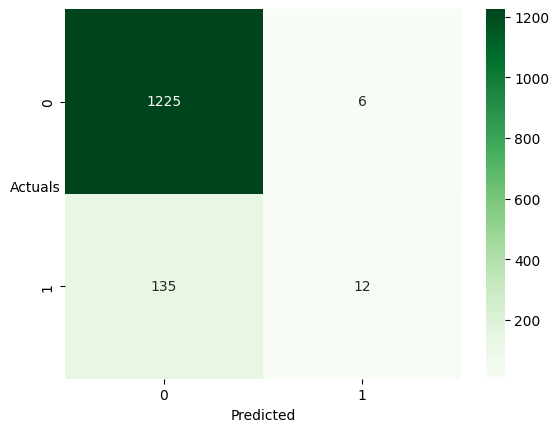

In [147]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [246]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.901     0.995     0.946      1231
           1      0.667     0.082     0.145       147

    accuracy                          0.898      1378
   macro avg      0.784     0.538     0.546      1378
weighted avg      0.876     0.898     0.860      1378



In [248]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.06:
        a=1
    else:
        a=0
    y_class_pred.append(a)

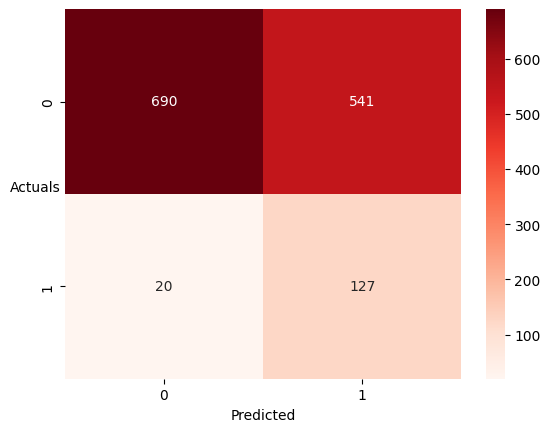

In [249]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

              precision    recall  f1-score   support

           0      0.956     0.795     0.868      1231
           1      0.288     0.694     0.407       147

    accuracy                          0.784      1378
   macro avg      0.622     0.745     0.638      1378
weighted avg      0.885     0.784     0.819      1378



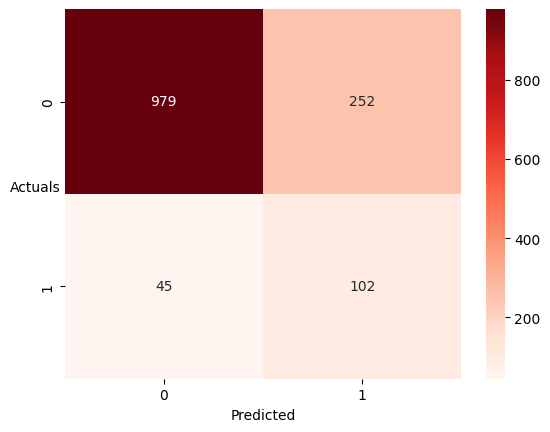

In [261]:
from sklearn import metrics

y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.15:
        a=1
    else:
        a=0
    y_class_pred.append(a)

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

In [ ]:
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

In [270]:
from sklearn.feature_selection import RFE #Very important
from sklearn.linear_model import LogisticRegression

In [271]:
LogR = LogisticRegression()

In [302]:
selector = RFE(estimator = LogR, n_features_to_select=14, step=1)

In [303]:
selector = selector.fit(X_train, y_train)

In [304]:
selector.n_features_

14

In [306]:
selector.ranking_

array([ 1,  1,  3, 40, 11,  8, 13, 23,  1, 15,  1, 39, 12,  6, 22, 25,  1,
       32, 30, 14, 16, 35, 33,  1, 37, 20,  5, 31,  2, 17, 24, 26,  7, 10,
       27, 41,  1, 34, 28, 38,  1,  1, 18,  1,  4,  1,  9, 29, 42, 36,  1,
       21,  1,  1, 19])

In [307]:
df_predCol = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector.ranking_})
df_predCol[df_predCol['Rank'] == 1]

,Feature,Rank
0,Operating_Expense_Rate,1
1,Research_and_development_expense_rate,1
8,Operating_Profit_Growth_Rate,1
10,Total_Asset_Growth_Rate,1
16,Interest_Expense_Ratio,1
23,Inventory_Turnover_Rate_times,1
36,Retained_Earnings_to_Total_Assets,1
40,Quick_Asset_Turnover_Rate,1
41,Cash_Turnover_Rate,1
43,Cash_Flow_to_Total_Assets,1


In [308]:
 f_pred_col = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Operating_Profit_Growth_Rate + Total_Asset_Growth_Rate +  Interest_Expense_Ratio + Inventory_Turnover_Rate_times + Retained_Earnings_to_Total_Assets + Quick_Asset_Turnover_Rate + Cash_Turnover_Rate + Cash_Flow_to_Total_Assets + CFO_to_Assets + No_credit_Interval  + Interest_Coverage_Ratio_Interest_expense_to_EBIT'

In [296]:
# f_pred_col = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Operating_Profit_Growth_Rate + Total_Asset_Growth_Rate + Interest_Expense_Ratio +  Inventory_Turnover_Rate_times + Retained_Earnings_to_Total_Assets + Quick_Asset_Turnover_Rate + Cash_Turnover_Rate + Cash_Flow_to_Total_Assets +CFO_to_Assets  + No_credit_Interval + Interest_Coverage_Ratio_Interest_expense_to_EBIT + Net_Income_Flag'

In [299]:
 #f_pred_col = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate + Operating_Profit_Growth_Rate + Total_Asset_Growth_Rate + Interest_Expense_Ratio +  Inventory_Turnover_Rate_times + Retained_Earnings_to_Total_Assets + Quick_Asset_Turnover_Rate + Cash_Turnover_Rate + Cash_Flow_to_Total_Assets +CFO_to_Assets  + No_credit_Interval + Interest_Coverage_Ratio_Interest_expense_to_EBIT'

In [309]:
#model_2 = SM.logit(formula = f_2, data=df_train).fit()
model_3 = SM.logit(formula = f_pred_col, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.236845
         Iterations 15


In [310]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Sun, 05 Nov 2023   Pseudo R-squ.:                  0.3024
Time:                        12:01:43   Log-Likelihood:                -326.37
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 8.829e-53
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                         1495.1419    600.961      2.488      0.013     317.279    2673.005
Operating_Expense_Rate                            6.917e-11   3.35e-11      2.066      0.039    3.56e-12    1.35e-10
Research_and_development_expense_rate             2.632e-10   6.77e-11      3.887      0.000     1.3e-10    3.96e-10
Operating_Profit_Growth_Rate                     -1240.5302    710.343     -1.746      0.081   -2632.777     151.717
Total_Asset_Growth_Rate                          -3.076e-12   4.05e-11     -0.076      0.939   -8.25e-11    7.63e-11
Interest_Expense_Ratio                              55.0748    170.999      0.322      0.747    -280.078     390.227
Inventory_Turnover_Rate_times                    -1.357e-11   3.54e-11     -0.383      0.702    -8.3e-11    5.59e-11
Retained_Earnings_to_Total_Assets                 -110.4750     10.116    -10.921      0.000    -130.302     -90.648
Quick_Asset_Turnover_Rate                        -3.027e-12   3.09e-11     -0.098      0.922   -6.35e-11    5.74e-11
Cash_Turnover_Rate                               -8.349e-11   4.12e-11     -2.027      0.043   -1.64e-10   -2.77e-12
Cash_Flow_to_Total_Assets                           -9.5654      4.769     -2.006      0.045     -18.913      -0.218
CFO_to_Assets                                        0.1467      2.001      0.073      0.942      -3.775       4.068
No_credit_Interval                                -482.8066    133.956     -3.604      0.000    -745.356    -220.257
Interest_Coverage_Ratio_Interest_expense_to_EBIT  -125.1135    170.949     -0.732      0.464    -460.168     209.941
====================================================================================================================
"""

In [350]:
 f_pred_col_2 = 'Default ~ Operating_Expense_Rate + Research_and_development_expense_rate  + Retained_Earnings_to_Total_Assets  + Cash_Turnover_Rate + Cash_Flow_to_Total_Assets  + No_credit_Interval '

In [351]:
model_4 = SM.logit(formula = f_pred_col_2, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.238748
         Iterations 9


In [352]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                            6
Date:                Sun, 05 Nov 2023   Pseudo R-squ.:                  0.2968
Time:                        14:20:43   Log-Likelihood:                -328.99
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 4.883e-57
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               402.2719     83.438      4.821      0.000     238.736     565.808
Operating_Expense_Rate                 6.862e-11   3.27e-11      2.096      0.036    4.44e-12    1.33e-10
Research_and_development_expense_rate  2.676e-10   6.63e-11      4.035      0.000    1.38e-10    3.98e-10
Retained_Earnings_to_Total_Assets      -117.2409      9.131    -12.840      0.000    -135.137     -99.345
Cash_Turnover_Rate                    -8.588e-11   4.09e-11     -2.099      0.036   -1.66e-10   -5.68e-12
Cash_Flow_to_Total_Assets               -10.5746      4.637     -2.280      0.023     -19.663      -1.486
No_credit_Interval                     -463.8164    132.203     -3.508      0.000    -722.930    -204.702
=========================================================================================================
"""

In [362]:
y_prob_pred_train = model_4.predict(df_train)

              precision    recall  f1-score   support

           0      0.970     0.810     0.883      1231
           1      0.331     0.789     0.467       147

    accuracy                          0.808      1378
   macro avg      0.651     0.800     0.675      1378
weighted avg      0.902     0.808     0.838      1378



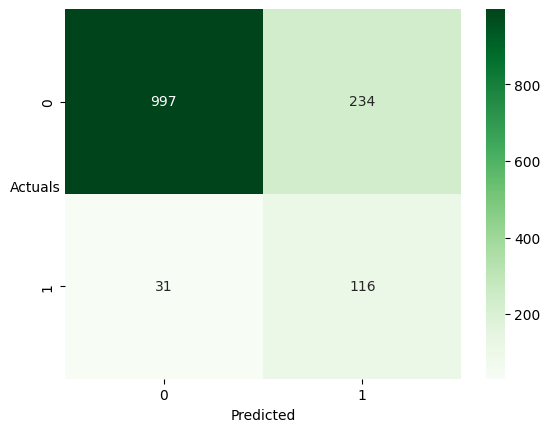

In [363]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

In [366]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [ ]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

In [368]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

           0      0.979     0.733     0.838      1231
           1      0.280     0.871     0.424       147

    accuracy                          0.747      1378
   macro avg      0.630     0.802     0.631      1378
weighted avg      0.905     0.747     0.794      1378



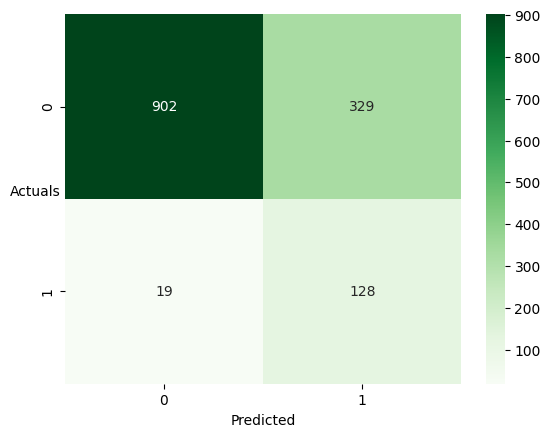

In [369]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

In [370]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

           0      0.972     0.791     0.872      1231
           1      0.316     0.810     0.455       147

    accuracy                          0.793      1378
   macro avg      0.644     0.800     0.664      1378
weighted avg      0.902     0.793     0.828      1378



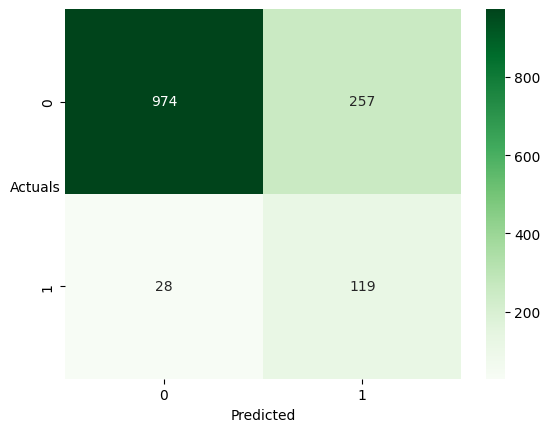

In [371]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

In [364]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.1:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

           0      0.970     0.810     0.883      1231
           1      0.331     0.789     0.467       147

    accuracy                          0.808      1378
   macro avg      0.651     0.800     0.675      1378
weighted avg      0.902     0.808     0.838      1378



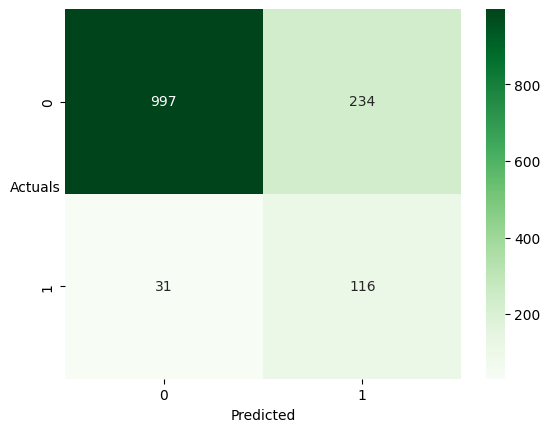

In [365]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

In [426]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

           0      0.970     0.820     0.889      1231
           1      0.344     0.789     0.479       147

    accuracy                          0.817      1378
   macro avg      0.657     0.805     0.684      1378
weighted avg      0.903     0.817     0.845      1378



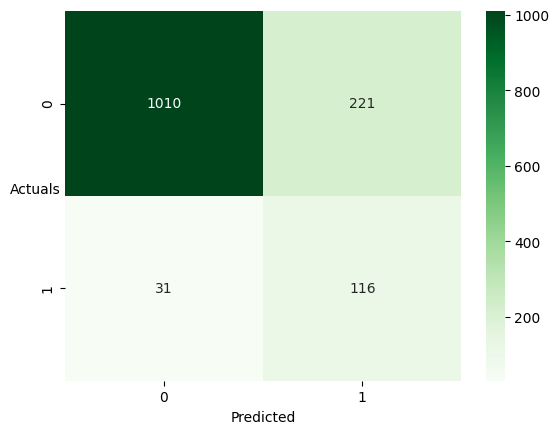

In [427]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(df_train['Default'],y_class_pred,digits=3))

AUC: 0.805


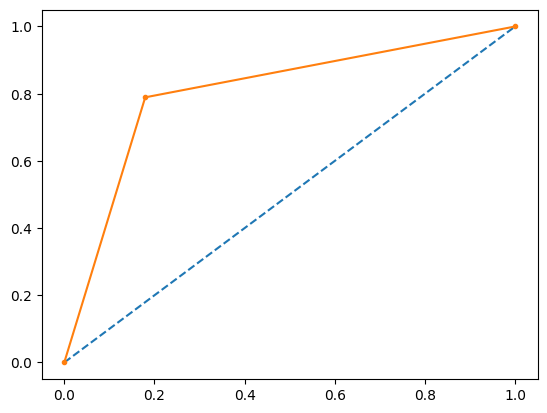

In [428]:
# AUC and ROC for the training data

# predict probabilities
# probs = model_4.predict_proba(y_class_pred)
# # keep probabilities for the positive outcome only
# probs = probs[:, 1]
# # calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(df_train['Default'], y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_train['Default'], y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Logistic model using Test Data

In [429]:
y_prob_pred_test = model_4.predict(df_test)

In [430]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.11:
        a=1
    else:
        a=0
    y_class_pred.append(a)

              precision    recall  f1-score   support

           0      0.966     0.843     0.901       607
           1      0.367     0.753     0.493        73

    accuracy                          0.834       680
   macro avg      0.666     0.798     0.697       680
weighted avg      0.902     0.834     0.857       680



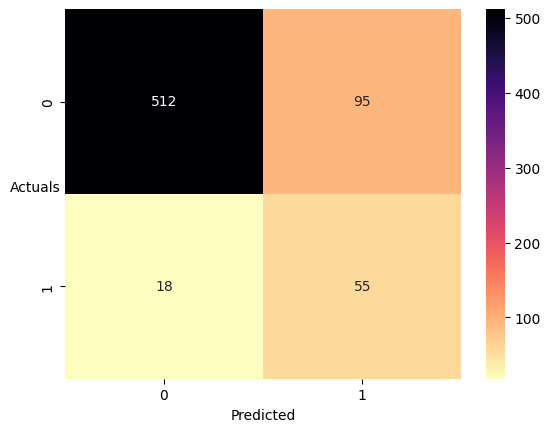

In [431]:
from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(df_test['Default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='magma_r');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(df_test['Default'],y_class_pred,digits=3))

AUC: 0.798


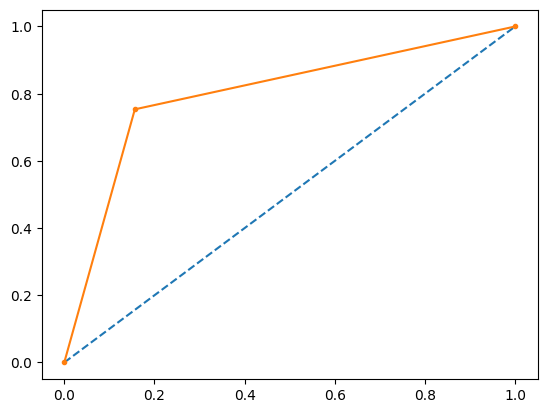

In [432]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(df_test['Default'], y_class_pred)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_test['Default'], y_class_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [181]:
param_grid = {
    'min_samples_split' : [30,50,70,100],
    'min_samples_leaf':[15,25,35,50],
    'max_depth':[5,10,15,20],
    'random_state' : [42]
}

In [182]:
RF_model=RandomForestClassifier()

In [185]:
grid_search=GridSearchCV(estimator=RF_model,param_grid=param_grid,cv=10)

In [187]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [15, 25, 35, 50],
                         'min_samples_split': [30, 50, 70, 100],
                         'random_state': [42]})

In [188]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=15, min_samples_split=50,
                       random_state=42)

In [189]:
RF_model_Fit=grid_search.best_estimator_

In [383]:
X_train

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,...,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability
2011,0.00,0.00,0.48,0.00,0.00,0.34,0.15,0.02,0.85,0.22,...,0.71,0.31,0.02,0.00,0.00,0.62,0.03,0.57,1,0.04
697,0.00,1750000000.00,0.47,0.00,0.32,0.32,0.19,0.02,0.85,0.22,...,0.62,0.31,0.03,0.00,0.00,0.62,0.03,0.57,1,0.03
160,0.00,0.00,0.46,0.00,0.00,0.31,0.17,0.02,0.85,0.22,...,0.55,0.32,0.04,0.00,0.01,0.62,0.03,0.57,1,0.02
1273,5960000000.00,2870000000.00,0.46,0.00,0.00,0.32,0.17,0.02,0.85,0.22,...,0.58,0.31,0.03,0.00,0.01,0.62,0.03,0.56,1,0.02
541,0.00,662000000.00,0.46,0.00,0.00,0.32,0.16,0.02,0.85,0.22,...,0.56,0.31,0.04,0.00,0.01,0.62,0.03,0.56,1,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,4260000000.00,0.00,0.47,0.00,0.25,0.32,0.18,0.02,0.85,0.22,...,0.59,0.32,0.03,0.00,0.00,0.63,0.03,0.57,1,0.04
1127,0.00,1380000000.00,0.46,0.00,0.22,0.32,0.20,0.02,0.85,0.22,...,0.59,0.31,0.03,0.00,0.01,0.62,0.03,0.57,1,0.02
950,5940000000.00,0.00,0.46,0.00,0.18,0.32,0.18,0.02,0.85,0.22,...,0.60,0.32,0.05,0.00,0.02,0.62,0.03,0.57,1,0.03
1058,0.00,3875000000.00,0.47,0.00,0.21,0.32,0.19,0.02,0.85,0.22,...,0.59,0.32,0.03,0.00,0.02,0.62,0.03,0.57,1,0.05


In [191]:
## Performance Matrix on train data set
y_train_predict = RF_model_Fit.predict(X_train)
model_score =RF_model_Fit.score(X_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

0.93033381712627
[[1216   15]
 [  81   66]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1231
           1       0.81      0.45      0.58       147

    accuracy                           0.93      1378
   macro avg       0.88      0.72      0.77      1378
weighted avg       0.92      0.93      0.92      1378



Axes(0.125,0.11;0.62x0.77)


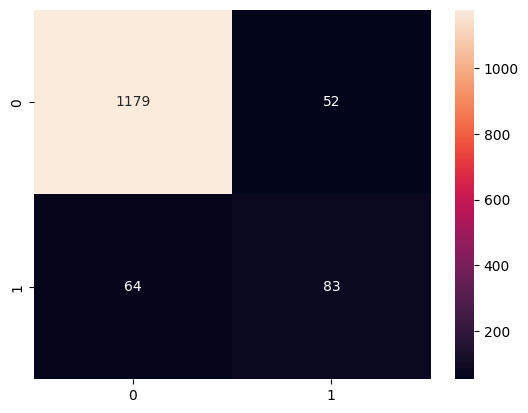

In [386]:
print(sns.heatmap(confusion_matrix(y_train, y_train_predict), annot=True , fmt="2g"))

AUC: 0.954


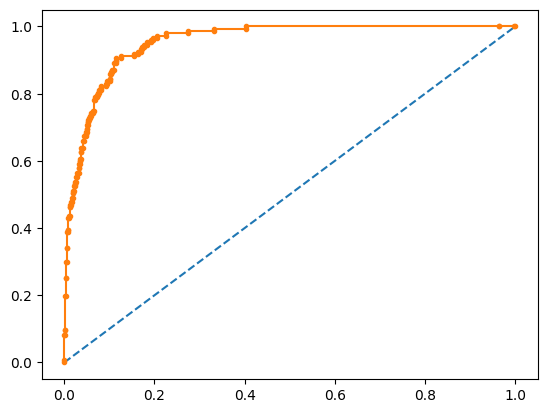

In [244]:
# AUC and ROC for the training data

# predict probabilities
probs = RF_model_Fit.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [388]:
# Performance Matrix on test data set
y_test_predict = RF_model_Fit.predict(X_test)
model_score = RF_model_Fit.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.9161764705882353
[[595  12]
 [ 45  28]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       607
           1       0.70      0.38      0.50        73

    accuracy                           0.92       680
   macro avg       0.81      0.68      0.72       680
weighted avg       0.91      0.92      0.91       680



Axes(0.125,0.11;0.62x0.77)


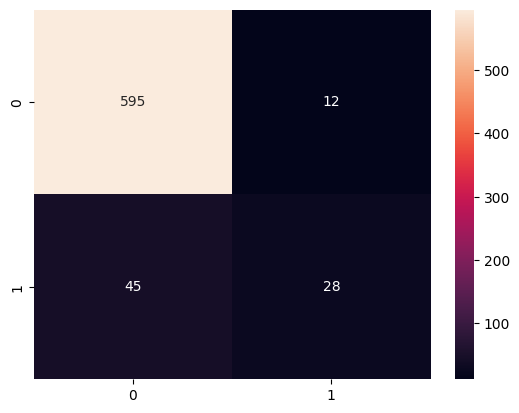

In [389]:
print(sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True , fmt="2g"))

AUC: 0.919


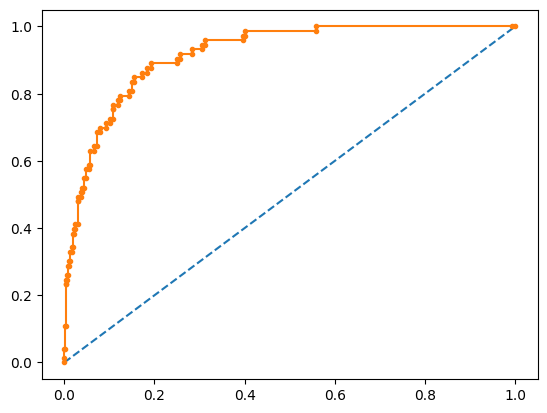

In [245]:
# AUC and ROC for the test data

# predict probabilities
probs = RF_model_Fit.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [194]:
# Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [394]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9158200290275762
[[1179   52]
 [  64   83]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1231
           1       0.61      0.56      0.59       147

    accuracy                           0.92      1378
   macro avg       0.78      0.76      0.77      1378
weighted avg       0.91      0.92      0.91      1378



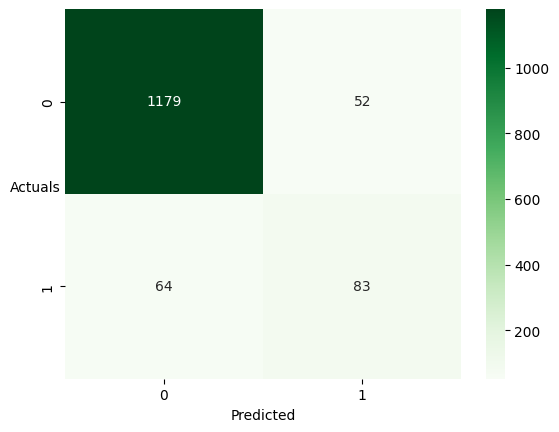

In [395]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g'
            ,cmap='Greens');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

AUC: 0.930


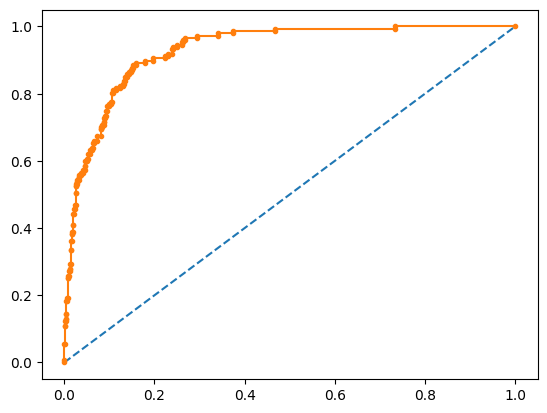

In [243]:
# AUC and ROC for the training data

# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [392]:
# Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.9073529411764706
[[578  29]
 [ 34  39]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       607
           1       0.57      0.53      0.55        73

    accuracy                           0.91       680
   macro avg       0.76      0.74      0.75       680
weighted avg       0.90      0.91      0.91       680



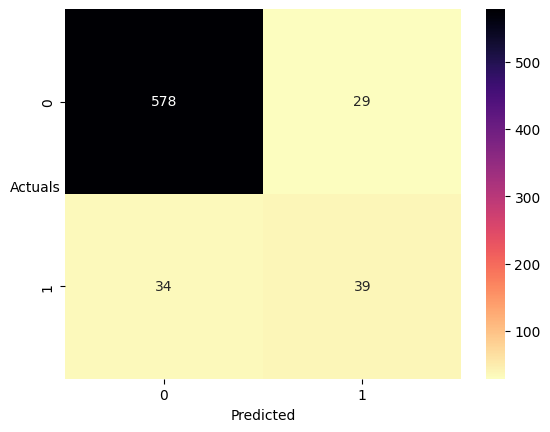

In [393]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g'
            ,cmap='magma_r');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

AUC: 0.901


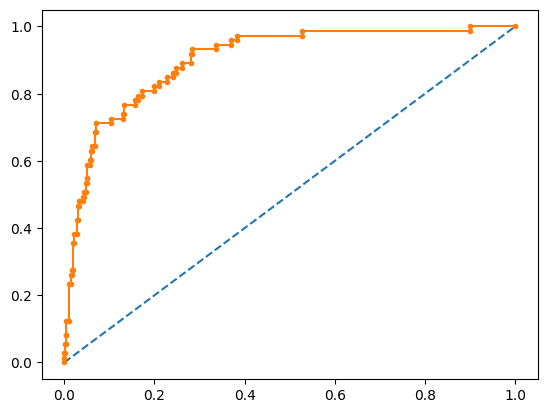

In [241]:
# AUC and ROC for the test data

# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()